<a href="https://colab.research.google.com/github/jamesmuiru/mlfccourse/blob/main/Healthcare_Infrastructure_Optimization_in_Central_Kenya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Access

In [2]:
import requests
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define URL and output path
url = "https://data.worldpop.org/GIS/Population_Density/Global_2000_2020_1km/2020/KEN/ken_pd_2020_1km.tif"
output_dir = "/content/drive/MyDrive/Miniproject/Population_density"
os.makedirs(output_dir, exist_ok=True)  # make folder if not exists
output_path = os.path.join(output_dir, "ken_pd_2020_1km.tif")

# Download file
r = requests.get(url, allow_redirects=True, stream=True)
with open(output_path, 'wb') as f:
    for chunk in r.iter_content(chunk_size=8192):
        if chunk:
            f.write(chunk)

print(f"✅ File downloaded and saved to: {output_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ File downloaded and saved to: /content/drive/MyDrive/Miniproject/Population_density/ken_pd_2020_1km.tif


In [4]:
raster_populationdensity="/content/drive/MyDrive/Miniproject/Population_density/ken_pd_2020_1km.tif"
counties_boundaries="/content/drive/MyDrive/Miniproject/Boundaries/ken_admbndl_admALL_iebc_itos_20191031.shp"
point_health_facilities="/content/drive/MyDrive/Miniproject/hotosm_ken_health_facilities_points_shp/hotosm_ken_health_facilities_points_shp.shp"
lines_roads="/content/drive/MyDrive/Miniproject/roads/hotosm_ken_roads_lines_shp.shp"
average_household="/content/drive/MyDrive/Miniproject/kenya-average-household-size-by-sub-county.csv"


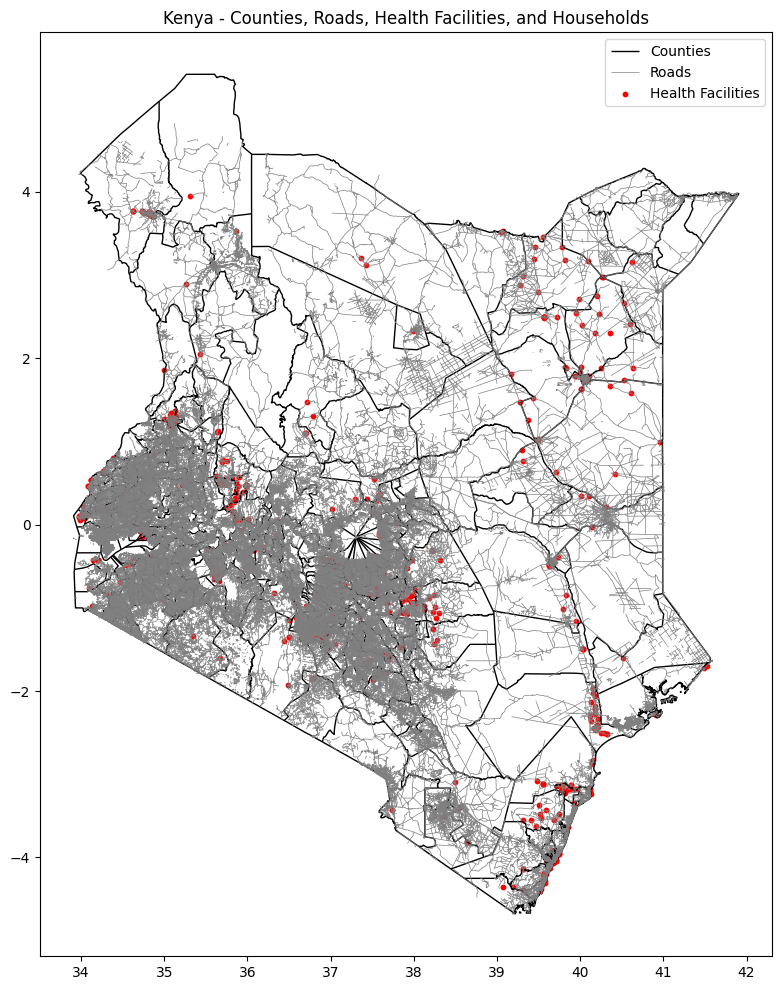

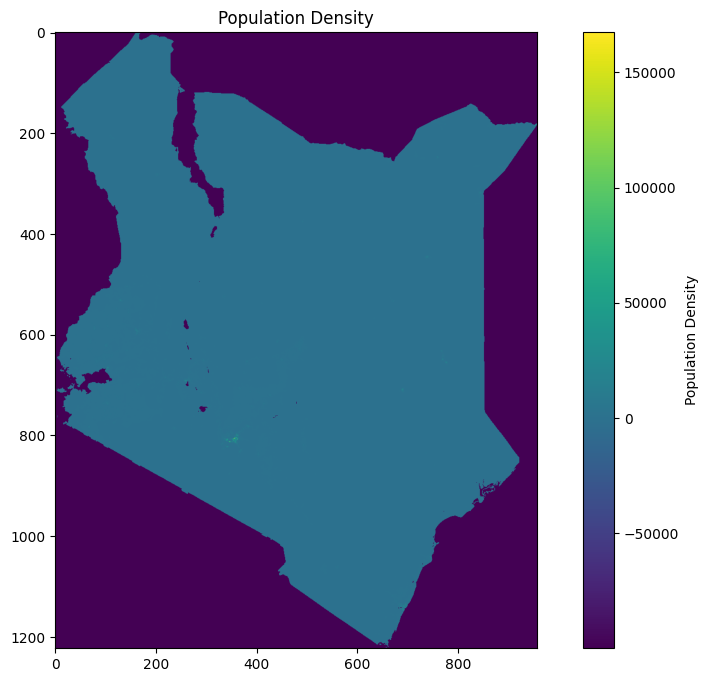

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
import pandas as pd # Import pandas

# Read vector datasets
gdf_counties = gpd.read_file(counties_boundaries)
gdf_health = gpd.read_file(point_health_facilities)
gdf_roads = gpd.read_file(lines_roads)
# Read CSV file using pandas
df_households = pd.read_csv(average_household)


# Plot vector datasets
fig, ax = plt.subplots(figsize=(12, 12))
gdf_counties.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1, label="Counties")
gdf_roads.plot(ax=ax, color="gray", linewidth=0.5, label="Roads")
gdf_health.plot(ax=ax, color="red", markersize=10, label="Health Facilities")
# Cannot plot df_households directly as it is not a GeoDataFrame
# gdf_households.plot(ax=ax, color="blue", markersize=5, label="Households")

# Add legend
plt.legend()
plt.title("Kenya - Counties, Roads, Health Facilities, and Households")
plt.show()

# Plot raster population density
src = rasterio.open(raster_populationdensity)
plt.figure(figsize=(12, 8))
plt.imshow(src.read(1), cmap="viridis")
plt.colorbar(label="Population Density")
plt.title("Population Density")
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 53.4 MB/s eta 0:00:00
